 make some mock square gauge images from rectangular gauge block images  
 should be able to do this with a  
 rotate to square gauge to image edge  
 a scale along width  
 reverse the rotation  

 use `plot_helpers.rotate` which also returns the gauge corners rotated the same as image  


In [165]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [166]:
from ls_fringeapp import fringeprocess as fp
from ls_fringeapp.load_equipment_data import repo_folder

In [167]:
import plot_helpers as ph

In [168]:
out_image_folder = repo_folder / "tests" / "data" / "mock_square_gauges"
to_process = repo_folder / "tests" / "data" / "Platen03" / "cropped" / "fflog.txt"

In [169]:
d2 = np.genfromtxt(
    to_process,
    delimiter="\t",
    dtype=None,
    usecols=(0, 1, 2, 3, 4, 5, 6, 7),
    unpack=True,
)
ffracs = np.array(d2[0])
fns = d2[1]
xys = np.array(d2[2:8]).T

index = 17
ffracs[index], fns[index], xys[index]


(np.float64(0.228182),
 np.str_('MSL-03_03-G.bmp'),
 array([  13.927,  128.5  , 1072.9  ,  215.06 , 1049.8  ,  480.52 ]))

In [170]:
len(fns)

19

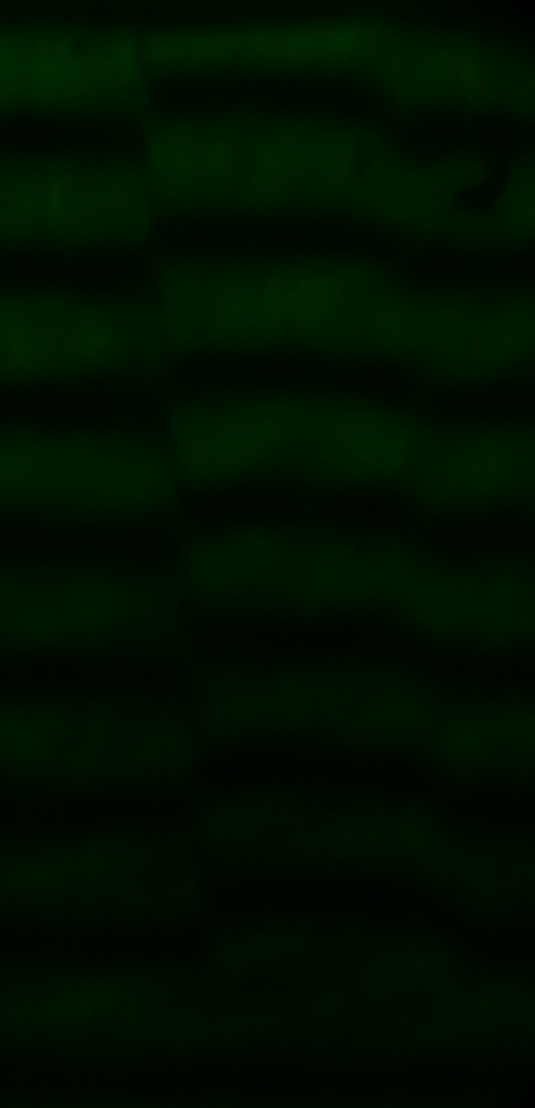

In [171]:
img_filename = to_process.parent / fns[index]
img = Image.open(img_filename)
img

In [172]:
f"{img.size=}"

'img.size=(535, 1108)'

In [173]:
xygb = xys[index].reshape((3, 2))
xygb

array([[  13.927,  128.5  ],
       [1072.9  ,  215.06 ],
       [1049.8  ,  480.52 ]])

In [174]:
img = img.convert("L")
img_array = np.asarray(img)
img_array.shape

(1108, 535)

In [175]:
ffrac, drawdata = fp.array2frac(img_array, xygb, drawinfo=True)
ffrac, ffracs[index]

(np.float64(0.24058578358160285), np.float64(0.228182))

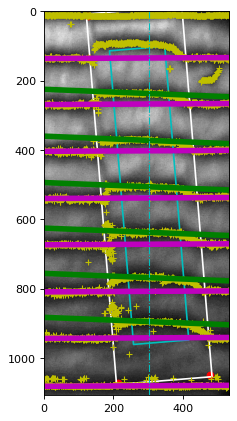

In [176]:
fig = plt.figure(figsize=(6, 6), dpi=80)
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])
ph.draw_gauge(axes, img_array, drawdata)

In [177]:
xy = xygb
length = ((xy[0, :] - xy[1, :]) ** 2).sum() ** 0.5
width = ((xy[1, :] - xy[2, :]) ** 2).sum() ** 0.5
scale = length / width
# angle of left hand edge to x-axis
phi = np.arctan2((xy[0, 1] - xy[1, 1]), (xy[0, 0] - xy[1, 0]))
length, width, np.rad2deg(phi)

(np.float64(1062.5047992028085),
 np.float64(266.46317118881547),
 np.float64(-175.32705621833372))

In [178]:
xy

array([[  13.927,  128.5  ],
       [1072.9  ,  215.06 ],
       [1049.8  ,  480.52 ]])

In [179]:
pa = xy[:, [1, 0]]
pa

array([[ 128.5  ,   13.927],
       [ 215.06 , 1072.9  ],
       [ 480.52 , 1049.8  ]])

In [180]:
# rotate gauge square to axis

img1, xy1 = ph.rotate(img, angle=-180 - np.rad2deg(phi), expand=True, points=pa)


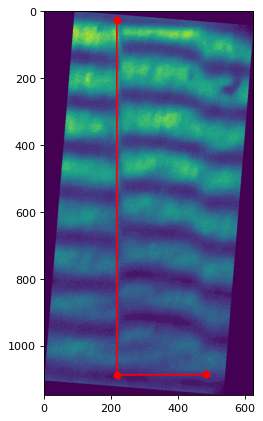

In [181]:
fig = plt.figure(figsize=(20, 6), dpi=80)
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])
axes.imshow(np.asarray(img1))
axes.axis("image")
axes.plot(xy1[:, 0], xy1[:, 1], "r-o")

In [182]:
xy1

array([[ 217.96063585,   24.398186  ],
       [ 217.96063585, 1086.9029852 ],
       [ 484.42014624, 1085.50623038]])

In [183]:
# scale along y
size = (int(scale * img1.size[0]), img1.size[1])
img2 = img1.resize(size)


In [184]:
S = np.array(((scale, 0), (0, 1)))
xy2 = np.dot(S, xy1.T).T
xy2

array([[ 869.10405141,   24.398186  ],
       [ 869.10405141, 1086.9029852 ],
       [1931.5942534 , 1085.50623038]])

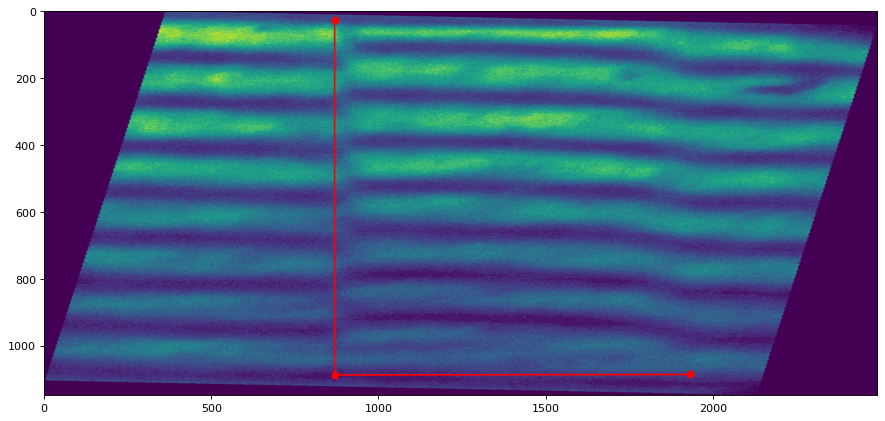

In [185]:
fig = plt.figure(figsize=(20, 6), dpi=80)
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])
axes.imshow(np.asarray(img2))
axes.axis("image")
axes.plot(xy2[:, 0], xy2[:, 1], "r-o")

In [186]:
# rotate back
img3, xy3 = ph.rotate(img2, angle=180 + np.rad2deg(phi), expand=True, points=xy2)


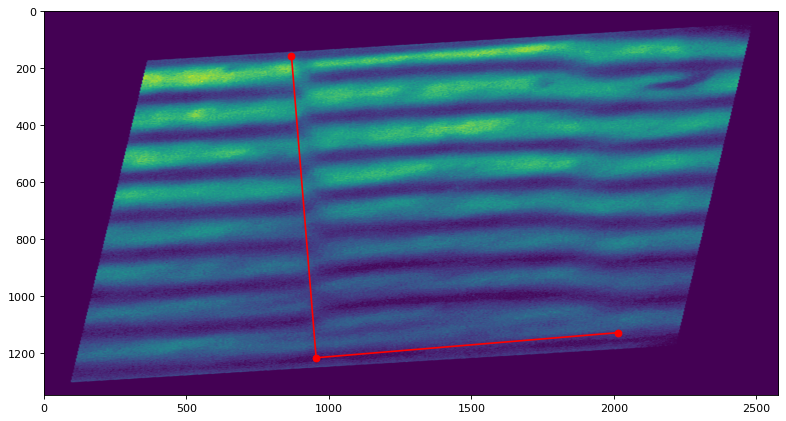

In [187]:
fig = plt.figure(figsize=(20, 6), dpi=80)
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])
axes.imshow(np.asarray(img3))
axes.axis("image")
axes.plot(xy3[:, 0], xy3[:, 1], "r-o")

In [188]:
# crop to a little outside square
xmargin = 200
ymargin = 50
box = (
    min(xy3[:, 0]) - xmargin,
    min(xy3[:, 1]) - ymargin,
    max(xy3[:, 0]) + xmargin,
    max(xy3[:, 1]) + ymargin,
)
img4 = img3.crop(box)


In [189]:
xy4 = xy3 - (box[0], box[1])

In [190]:
box

(np.float64(668.5819776767494),
 np.float64(106.92998875637153),
 np.float64(2213.986638351771),
 np.float64(1265.902988756371))

In [191]:
xy3, xy4

(array([[ 868.58197768,  156.92998876],
        [ 955.14197768, 1215.90298876],
        [2013.98663835, 1127.952066  ]]),
 array([[ 200.        ,   50.        ],
        [ 286.56      , 1108.973     ],
        [1345.40466068, 1021.02207724]]))

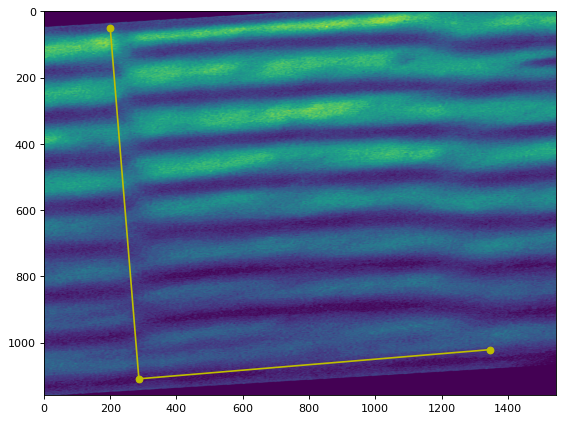

In [192]:
fig = plt.figure(figsize=(20, 6), dpi=80)
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])
axes.imshow(np.asarray(img4))
axes.axis("image")
axes.plot(xy4[:, 0], xy4[:, 1], "y-o")

In [193]:
# can `array2frac` cope with slivers of background?
xygb = xy4[:, [1, 0]]
ffrac, drawdata = fp.array2frac(
    np.asarray(img4), xygb, drawinfo=True, border=(0.1, 0.1)
)
ffrac, ffracs[index]

(np.float64(0.2379427242768351), np.float64(0.228182))

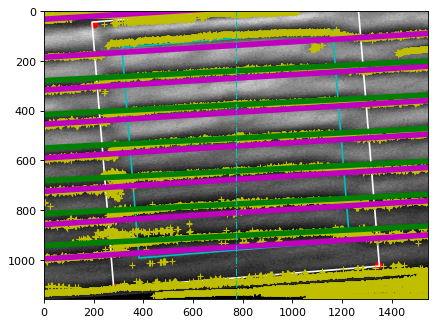

In [194]:
fig = plt.figure(figsize=(6, 6), dpi=80)
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])
ph.draw_gauge(axes, np.asarray(img4), drawdata)

In [195]:
# reset image and gauge corners
img_filename = to_process.parent / fns[index]
img = Image.open(img_filename)
img = img.convert("L")

xygb = xys[index].reshape((3, 2))

In [196]:
# use new function in plot_helpers
img_sq, xy_sq = ph.make_square_gauge(img, xygb)

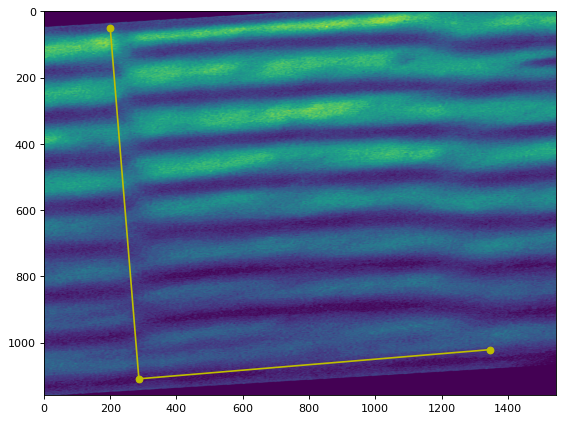

In [197]:
fig = plt.figure(figsize=(20, 6), dpi=80)
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])
axes.imshow(np.asarray(img_sq))
axes.axis("image")
axes.plot(xy_sq[:, 1], xy_sq[:, 0], "y-o")

In [204]:
img_hole = ph.blur_gauge_hole(img_sq, xy_sq)

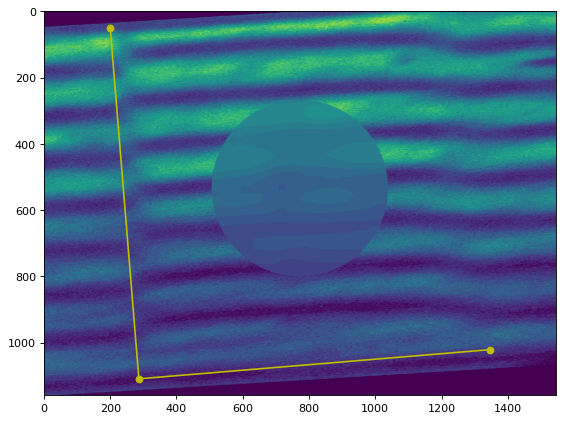

In [205]:
fig = plt.figure(figsize=(20, 6), dpi=80)
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])
axes.imshow(np.asarray(img_hole))
axes.axis("image")
axes.plot(xy_sq[:, 1], xy_sq[:, 0], "y-o")